# **Logistic regression for the generated synthetic data**

Epoch 0, Loss: 0.6931471805599453
Epoch 100, Loss: 0.49460790340074695
Epoch 200, Loss: 0.4159505866132634
Epoch 300, Loss: 0.36574065632085356
Epoch 400, Loss: 0.33096403407589703
Epoch 500, Loss: 0.30530993852081945
Epoch 600, Loss: 0.28546802806361576
Epoch 700, Loss: 0.26956009658009206
Epoch 800, Loss: 0.2564463769567223
Epoch 900, Loss: 0.2453956416285597


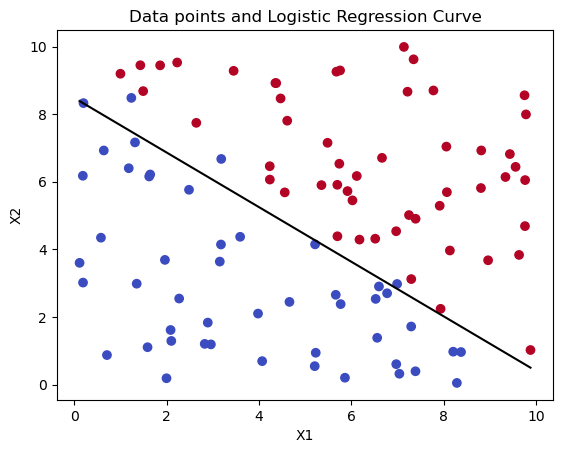

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(num_samples=100):
    np.random.seed(0)
    X = np.random.rand(num_samples, 2) * 10
    y = (X[:, 0] + X[:, 1] > 10).astype(int)
    return X, y

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

learning_rate = 0.1
num_epochs = 1000

def gradient_descent(X, y, learning_rate, num_epochs):
    num_samples, num_features = X.shape
    w = np.zeros(num_features)
    b = 0
    
    for epoch in range(num_epochs):
        z = np.dot(X, w) + b
        y_pred = sigmoid(z)
        
        loss = binary_cross_entropy(y, y_pred)
        
        dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
        db = (1 / num_samples) * np.sum(y_pred - y)
        
        w -= learning_rate * dw
        b -= learning_rate * db
        
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')
            
    return w, b

def plot_data_with_logistic_regression(X, y, w, b):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    
    x_plot = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
    y_plot = -(b + w[0] * x_plot) / w[1]
    plt.plot(x_plot, y_plot, color='black')
    
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Data points and Logistic Regression Curve')
    plt.show()

def main():
    X, y = generate_data()
    w, b = gradient_descent(X, y, learning_rate, num_epochs)
    plot_data_with_logistic_regression(X, y, w, b)

if __name__ == "__main__":
    main()
